Name: Cathaoir Agnew

ID : 16171659


#**Task 1**  
********************************************************************************

### **Part A**

In [37]:
# edit distance function 
def edDistRecursive(x,y):
  if len(x) == 0: return len(y)
  if len(y) == 0: return len(x)

  #levenshtein has a subsitution cost of 2
  delt = 2 if x[-1] != y[-1] else 0

  diag = edDistRecursive(x[:-1], y[:-1]) + delt
  vert = edDistRecursive(x[:-1], y) + 1
  horz = edDistRecursive(x, y[:-1]) + 1

  return min(diag,vert,horz)

### **Part B**

In [38]:
import time

start = time.time()
str1 = 'INTENTION'
str2 = 'EXECUTION'
print(f'Edit Distance between "{str1}" and "{str2}": {edDistRecursive(str1, str2)}')
end = time.time()

print("---" ,end-start ,"seconds ---")

Edit Distance between "INTENTION" and "EXECUTION": 8
--- 0.834557294845581 seconds ---


#**Task 2**  
********************************************************************************


### **Part A,B**

In [39]:

# A Dynamic Programming based Python program for edit distance problem 
def editDistDP(str1, str2, m, n): 
    # Create a table to store results of subproblems 
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
    # Fill dp[][] in bottom up manner 
    for i in range(m + 1): 
        for j in range(n + 1): 
  
            # If first string is empty, only option is to insert all characters of second string 
            if i == 0: 
                dp[i][j] = j    # Min. operations = j 
  
            # If second string is empty, only option is to remove all characters of first string 
            elif j == 0: 
                dp[i][j] = i    # Min. operations = i 
  
            # If last characters are same, ignore last char and recur for remaining string 
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = dp[i-1][j-1] 
  
            # If last character are different, consider all possibilities and find minimum 
            else: 
                dp[i][j] =  1 +  min(dp[i][j-1]   ,      # Insert 
                                     dp[i-1][j]     ,    # Remove 
                                     dp[i-1][j-1] + 1)   # Replace carries a cost of 2, 
                                                       # so must add 1 to dp[i-1][j-1] to account for this as 1 is going to be already added to it

           # below would also work 
           # If last character are different, consider all possibilities and find minimum 
           #else: 
               # dp[i][j] =     min( dp[i][j-1] + 1,        # Insert 
               #                     dp[i-1][j] + 1,        # Remove 
               #                     dp[i-1][j-1] + 2 )     # Replace carries a cost of 2, 

    return dp[m][n]
    
  
# Driver program 
start1 = time.time()

str1 = "INTENTION"
str2 = "EXECUTION" 
print("Levenshtein distance:" ,editDistDP(str1, str2, len(str1), len(str2))) 
end1 = time.time()

print("---" ,end1-start1 ,"seconds ---")

Levenshtein distance: 8
--- 0.0002598762512207031 seconds ---


### **Part C**

In [40]:
from tabulate import tabulate

# A Dynamic Programming based Python program for edit distance problem 
def editDistDP(str1, str2, m, n): 
    # Create a table to store results of subproblems 
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
    ptr = [["" for x in range(n + 1)] for x in range(m + 1)] 
  
    # Fill dp[][] in bottom up manner 
    for i in range(m + 1): 
        for j in range(n + 1): 

            # If first string is empty, only option is to insert all characters of second string 
            if i == 0: 
                dp[i][j] = j    # Min. operations = j 

                if j > 0:          
                  ptr[i][j] = '⇐' + str(dp[i][j])
  
            # If second string is empty, only option is to remove all characters of first string 
            elif j == 0: 
                dp[i][j] = i    # Min. operations = i 
                if i > 0:
                  ptr[i][j] = "⇑" + str(dp[i][j])
  
            # If last characters are same, ignore last char and recur for remaining string 
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = dp[i-1][j-1]

                if dp[i][j] - dp[i-1][j-1] == 0:
                  ptr[i][j] +=  ("⇖") 

                if dp[i][j] - dp[i][j-1] == 1:
                  ptr[i][j] +=  '⇐' 

                if dp[i][j] - dp[i-1][j] == 1:
                  ptr[i][j] +=  "⇑" 

                ptr[i][j] += str(dp[i][j])                
  
            # If last character are different, consider all possibilities and find minimum 
            else: 
                dp[i][j] =      min(dp[i][j-1] + 1   ,  # Insert 
                                    dp[i-1][j] + 1  ,   # Remove 
                                    dp[i-1][j-1] + 2)   # Replace carries a cost of 2, 
                                                
                #arrows = ['⇐' ,"⇑", "⇖"]

                if dp[i][j] - dp[i-1][j-1] == 2:
                  ptr[i][j] +=  ("⇖") 

                if dp[i][j] - dp[i][j-1] == 1:
                  ptr[i][j] +=  '⇐' 

                if dp[i][j] - dp[i-1][j] == 1:
                  ptr[i][j] +=  "⇑" 

                ptr[i][j] += str(dp[i][j])
            
            ptr[0][0] = 0

    
    ptr_tab = tabulate(ptr)

    return ptr_tab

    
# Driver program 
start1 = time.time()

str1 = "INTENTION"
str2 = "EXECUTION" 
print(editDistDP(str1, str2, len(str1), len(str2))) 

end1 = time.time()

print("---" ,end1-start1 ,"seconds ---")

--  ----  ----  -----  -----  -----  ----  -----  -----  ----
0   ⇐1    ⇐2    ⇐3     ⇐4     ⇐5     ⇐6    ⇐7     ⇐8     ⇐9
⇑1  ⇖⇐⇑2  ⇖⇐⇑3  ⇖⇐⇑4   ⇖⇐⇑5   ⇖⇐⇑6   ⇖⇐⇑7  ⇖6     ⇐7     ⇐8
⇑2  ⇖⇐⇑3  ⇖⇐⇑4  ⇖⇐⇑5   ⇖⇐⇑6   ⇖⇐⇑7   ⇖⇐⇑8  ⇑7     ⇖⇐⇑8   ⇖7
⇑3  ⇖⇐⇑4  ⇖⇐⇑5  ⇖⇐⇑6   ⇖⇐⇑7   ⇖⇐⇑8   ⇖7    ⇐⇑8    ⇖⇐⇑9   ⇑8
⇑4  ⇖3    ⇐4    ⇖⇐5    ⇐6     ⇐7     ⇐⇑8   ⇖⇐⇑9   ⇖⇐⇑10  ⇑9
⇑5  ⇑4    ⇖⇐⇑5  ⇖⇐⇑6   ⇖⇐⇑7   ⇖⇐⇑8   ⇖⇐⇑9  ⇖⇐⇑10  ⇖⇐⇑11  ⇖⇑10
⇑6  ⇑5    ⇖⇐⇑6  ⇖⇐⇑7   ⇖⇐⇑8   ⇖⇐⇑9   ⇖8    ⇐9     ⇐10    ⇐⇑11
⇑7  ⇑6    ⇖⇐⇑7  ⇖⇐⇑8   ⇖⇐⇑9   ⇖⇐⇑10  ⇑9    ⇖8     ⇐9     ⇐10
⇑8  ⇑7    ⇖⇐⇑8  ⇖⇐⇑9   ⇖⇐⇑10  ⇖⇐⇑11  ⇑10   ⇑9     ⇖8     ⇐9
⇑9  ⇑8    ⇖⇐⇑9  ⇖⇐⇑10  ⇖⇐⇑11  ⇖⇐⇑12  ⇑11   ⇑10    ⇑9     ⇖8
--  ----  ----  -----  -----  -----  ----  -----  -----  ----
--- 0.0018832683563232422 seconds ---


#**Part 3**  
********************************************************************************

### **Part A** 

In [41]:
!pip install names-dataset

### **Part B**

In [42]:
!pip install jellyfish

## **Github code provided on dataset person's page**

Link to search_first_name & search_last_name, which came with data

https://github.com/philipperemy/name-dataset/blob/a5852a15dd0ce05d7d78ee63b5d2cc98aefac421/names_dataset/query.py#L22

********************************************************************

In [43]:
# example from the github with data 

# search_first_name & search_last_name can handle strings when considering upper & lower case

from names_dataset import NameDataset
m = NameDataset()
print(m.search_first_name('Mikael'))
print(m.search_first_name('mikael'))
print(m.search_first_name('MIKAEL'))
print("")
print(m.search_last_name('Remy'))
print(m.search_last_name('remy'))
print(m.search_last_name('REMY'))

True
True
True

True
True
True


### **Part C**

In [44]:
# function to check first & last name 
def name_check(first,last):
  m = NameDataset()
  if type(first) == str and type(last) == str:
    print(m.search_first_name(first))
    print(m.search_last_name(last))
  else: 
    print("Please insert a string in the format: 'first name', 'last name")

# test for Cathaoir Agnew
name_check('Cathaoir','Agnew')

True
True


### **Part D**

In [45]:
import jellyfish

# soundex can handle strings when considering upper & lower case

def name_soundex(first,last):
  if type(first) == str and type(last) == str:
    print(jellyfish.soundex(first))
    print(jellyfish.soundex(last))
  else: 
    print("Please insert a string in the format: 'first name' , 'last name' ")

name_soundex('Cathaoir', 'Agnew')
print("")
name_soundex('cathaoir', 'AGNEW')



C360
A250

C360
A250


### **Part E**

Going to make it easier for the search, will only calculate the codes if they begin with the starting letter of the input name. As soundex does not remove the first letter, and the letter in the soundex code is genereated from the first letter in the string (ie the input name for this example) 

In [46]:
import pandas as pd

def name_sound_matches(input_name):

  # calculate the soundex code for original input name
  input_soundex_code = jellyfish.soundex(input_name)

  for i in m.first_names:
    # first try block to make sure valid characters for soundex are considered 
    try:

      # want to first match on first letter of each string, as this is how soundex code is created
      # stops calculating soundex of all names, just for efficieny, also soundex only allows english alphabeat characters
      # no need to calculate strings that do not start with matching first strings, because of the way soundex works 

      if i[0] == input_name[0].lower():
        if jellyfish.soundex(i) == input_soundex_code:
          print(i , jellyfish.soundex(i))  
      
    # passes through any exceptions that may be thrown, ie non english charachers A-Z , a-z 
    except:
      continue

# Driver program 
start2 = time.time()
name_sound_matches('Cathaoir')
end2 = time.time()
print("---" ,end2-start2 ,"seconds ---")

chidera C360
cater C360
catera C360
chitara C360
chitro C360
catara C360
chaithra C360
catoria C360
codera C360
codrey C360
cedra C360
chaudhary C360
cidera C360
coder C360
cutter C360
chaitra C360
cedria C360
couture C360
cathaoir C360
chitra C360
cathair C360
cedri C360
cattier C360
cedrie C360
chuhdary C360
chatara C360
cody-ray C360
cederia C360
catori C360
choudhary C360
caterra C360
choudary C360
cetera C360
choudhury C360
cowdry C360
cather C360
chowdhury C360
cheetara C360
chaudhry C360
cedrea C360
chetara C360
chaudry C360
cotter C360
cateria C360
chader C360
coudrey C360
codero C360
cedor C360
choudhry C360
coderro C360
catria C360
catiria C360
caitria C360
citori C360
--- 0.06376218795776367 seconds ---


In [47]:
# few test cases
print(jellyfish.soundex('choudhry'))
print(jellyfish.soundex('chatara'))
print(jellyfish.soundex('cedor'))
print(jellyfish.soundex('citori'))
print(jellyfish.soundex('catria'))
print(jellyfish.soundex('cutter'))

C360
C360
C360
C360
C360
C360


### **Part F**
A quick look at the docs shows the built in LD calculator has a transformation/subsitution cost of 1 and not 2 like  in our previous questions:

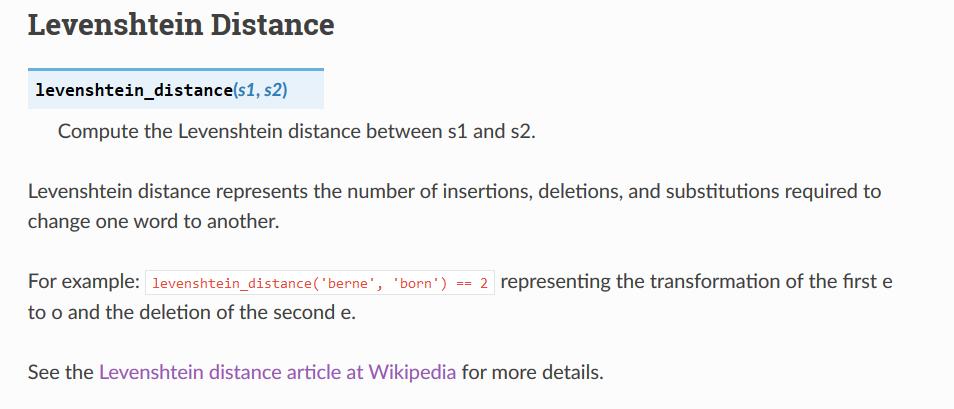

In [48]:
# need to make all letters lower case

def name_LD(first, last):
  if type(first) == str and type(last) == str:
    distance = jellyfish.levenshtein_distance(first.lower(), last.lower())
    print(distance)
  else: 
    print("Please insert a string in the format: 'first name' , 'last name' ")

name_LD('Cathaoir', 'agnew')
print("")
name_LD('cathaoir', 'AGNEW')

7

7


In [49]:
print(jellyfish.levenshtein_distance('berne', 'born'))
print("")
name_LD('berne', 'born')

2

2
